In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr

In [3]:
data = pd.read_csv("cme_events.csv")
data.head()

,Sno,src,date,time,ang_wdt,vcdaw,spce_spd,fht_spd2,20RS_spd2,accel,...,meanB,mc,v_trans,trans_time,icme_sz,Icme_min_Bz,sheath_spd,sheath_sz,sheath_dst,sheath Bz
0,1,NaN,1996/12/19,16:30,130.0,469.0,NaN,NaN,NaN,NaN,...,10.0,2.0,435.0,95,NaN,NaN,NaN,NaN,NaN,NaN
1,2,S18E06,1997/01/06,15:10,360.0,136.0,232.0,224.0,319.0,4.1,...,14.0,2.0,507.0,81,NaN,NaN,NaN,NaN,NaN,NaN
2,3,S38W31,1997/02/07,0:30,360.0,490.0,584.0,718.0,635.0,14.3,...,8.0,2.0,683.0,60,NaN,NaN,NaN,NaN,NaN,NaN
3,4,S28E19,1997/04/07,14:27,360.0,878.0,1115.0,905.0,896.0,3.3,...,20.0,2.0,552.0,74,NaN,NaN,NaN,NaN,NaN,NaN
4,5,N21W19,1997/05/12,5:30,360.0,464.0,749.0,335.0,220.0,-15.0,...,21.0,2.0,616.0,67,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
drop_col=['Sno']
data.drop(drop_col, inplace=True, axis=1)
data.head()

,src,date,time,ang_wdt,vcdaw,spce_spd,fht_spd2,20RS_spd2,accel,mass,...,meanB,mc,v_trans,trans_time,icme_sz,Icme_min_Bz,sheath_spd,sheath_sz,sheath_dst,sheath Bz
0,NaN,1996/12/19,16:30,130.0,469.0,NaN,NaN,NaN,NaN,5.100000e+14,...,10.0,2.0,435.0,95,NaN,NaN,NaN,NaN,NaN,NaN
1,S18E06,1997/01/06,15:10,360.0,136.0,232.0,224.0,319.0,4.1,5.800000e+14,...,14.0,2.0,507.0,81,NaN,NaN,NaN,NaN,NaN,NaN
2,S38W31,1997/02/07,0:30,360.0,490.0,584.0,718.0,635.0,14.3,4.100000e+15,...,8.0,2.0,683.0,60,NaN,NaN,NaN,NaN,NaN,NaN
3,S28E19,1997/04/07,14:27,360.0,878.0,1115.0,905.0,896.0,3.3,1.000000e+16,...,20.0,2.0,552.0,74,NaN,NaN,NaN,NaN,NaN,NaN
4,N21W19,1997/05/12,5:30,360.0,464.0,749.0,335.0,220.0,-15.0,4.200000e+15,...,21.0,2.0,616.0,67,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def datainfo(*var,cols=None):
    if cols is not None:  
        data_subset = data[cols]  # Select only the specified columns  
    else:  
        data_subset = data  # Use the full dataset 

    if 's' in var:
        print(data_subset.shape)
    if 'c' in var:
        print(data_subset.columns)
    if 'd' in var:
        print(data_subset.dtypes)
    if 'n' in var:
        print(data_subset.isna().sum())


In [6]:
datainfo('s','c')

(290, 43)
Index(['src', 'date', 'time', 'ang_wdt', 'vcdaw', 'spce_spd', 'fht_spd2',
       '20RS_spd2', 'accel', 'mass', 'KE', 'mpa', 'src_typ', 'NOAA',
       'onset_time', 'hale_class', 'flr_class', 'flr_dt', 'flr_tm',
       'icme_dst_dt', 'icme_dst_tm', 'plsm_strt_dt', 'plsm_strt_tm',
       'plsm_end_dt', 'plsm_end_tm', 'comp_strt', 'comp_end', 'qual', 'dv',
       'fst_fwd_shck', 'v', 'min_dst_icme', 'v_max', 'meanB', 'mc', 'v_trans',
       'trans_time', 'icme_sz', 'Icme_min_Bz', 'sheath_spd', 'sheath_sz',
       'sheath_dst', 'sheath Bz'],
      dtype='object')


In [7]:
data.describe()

,ang_wdt,vcdaw,spce_spd,fht_spd2,20RS_spd2,accel,mass,KE,mpa,NOAA,...,min_dst_icme,v_max,meanB,mc,v_trans,Icme_min_Bz,sheath_spd,sheath_sz,sheath_dst,sheath Bz
count,286.000000,286.000000,182.000000,283.000000,283.000000,283.000000,2.660000e+02,2.660000e+02,285.000000,267.000000,...,290.000000,273.000000,273.000000,273.000000,283.000000,75.000000,73.00000,73.000000,67.000000,69.000000
mean,297.835664,788.423077,1202.120879,787.190813,800.579505,-2.808481,8.675735e+15,7.485501e+31,187.708772,10835.651685,...,-84.703448,571.062271,12.765568,1.197802,689.192473,-11.378667,566.60274,28.904110,-60.791045,-8.266667
std,111.711742,497.226976,547.326689,465.892888,509.683677,35.247649,1.216717e+16,2.990125e+32,102.716464,1584.881669,...,70.763618,179.267217,30.030070,1.180912,257.201401,9.019413,157.64832,18.683151,59.499819,6.700893
min,10.000000,104.000000,129.000000,119.000000,0.000000,-158.100000,1.500000e+12,1.600000e+28,0.000000,8009.000000,...,-422.000000,310.000000,1.000000,0.000000,330.000000,-45.900000,338.00000,1.000000,-383.000000,-32.300000
25%,211.250000,441.500000,838.500000,457.500000,424.500000,-12.050000,2.300000e+15,2.450000e+30,90.000000,9408.500000,...,-107.750000,460.000000,7.000000,0.000000,520.000000,-15.250000,464.00000,15.000000,-76.500000,-10.200000
50%,360.000000,673.000000,1108.500000,665.000000,682.000000,0.200000,5.550000e+15,1.250000e+31,189.000000,10930.000000,...,-71.000000,530.000000,10.000000,1.000000,630.000000,-8.900000,541.00000,24.000000,-41.000000,-6.600000
75%,360.000000,1061.000000,1415.750000,1038.000000,1085.000000,6.950000,1.300000e+16,5.200000e+31,275.000000,12058.000000,...,-36.000000,650.000000,14.000000,2.000000,805.000000,-5.450000,634.00000,40.000000,-23.000000,-4.100000
max,1233.000000,3387.000000,3656.000000,3142.000000,3330.000000,211.600000,1.600000e+17,4.200000e+33,358.000000,13514.000000,...,7.000000,1900.000000,500.000000,15.000000,2185.000000,-0.100000,1161.00000,80.000000,-1.000000,-0.300000


In [8]:
datainfo('n')

src              16
date              0
time              3
ang_wdt           4
vcdaw             4
spce_spd        108
fht_spd2          7
20RS_spd2         7
accel             7
mass             24
KE               24
mpa               5
src_typ           0
NOAA             23
onset_time       19
hale_class       24
flr_class       142
flr_dt          226
flr_tm          226
icme_dst_dt      10
icme_dst_tm      10
plsm_strt_dt      0
plsm_strt_tm      0
plsm_end_dt       0
plsm_end_tm       0
comp_strt       172
comp_end        182
qual              3
dv               14
fst_fwd_shck      0
v                 3
min_dst_icme      0
v_max            17
meanB            17
mc               17
v_trans           7
trans_time        0
icme_sz         211
Icme_min_Bz     215
sheath_spd      217
sheath_sz       217
sheath_dst      223
sheath Bz       221
dtype: int64


In [9]:
datainfo('d')

src              object
date             object
time             object
ang_wdt         float64
vcdaw           float64
spce_spd        float64
fht_spd2        float64
20RS_spd2       float64
accel           float64
mass            float64
KE              float64
mpa             float64
src_typ          object
NOAA            float64
onset_time       object
hale_class       object
flr_class        object
flr_dt           object
flr_tm           object
icme_dst_dt      object
icme_dst_tm      object
plsm_strt_dt     object
plsm_strt_tm     object
plsm_end_dt      object
plsm_end_tm      object
comp_strt       float64
comp_end        float64
qual             object
dv              float64
fst_fwd_shck     object
v               float64
min_dst_icme      int64
v_max           float64
meanB           float64
mc              float64
v_trans         float64
trans_time       object
icme_sz          object
Icme_min_Bz     float64
sheath_spd      float64
sheath_sz       float64
sheath_dst      

### DateTime Col Insertion

In [10]:
data.insert(1,'datetime',pd.to_datetime(data['date'] + ' ' + data['time'], errors='coerce')) # Join date time column 
data.dropna(subset=['datetime'], inplace = True) #drop rows where datetime is NaT
data.drop(columns=['date','time'], inplace = True)

In [11]:
data["datetime"].dtypes

dtype('<M8[ns]')

### Sun Values

In [12]:
sun_cols = ['ang_wdt', 'vcdaw', 'spce_spd', 'fht_spd2','20RS_spd2', 'accel', 'mass', 'KE', 'mpa']

In [13]:
numeric_col = ['ang_wdt','fht_spd2','20RS_spd2']
data[numeric_col] = data[numeric_col].apply(pd.to_numeric)

In [14]:
datainfo('d',cols=sun_cols)

ang_wdt      float64
vcdaw        float64
spce_spd     float64
fht_spd2     float64
20RS_spd2    float64
accel        float64
mass         float64
KE           float64
mpa          float64
dtype: object


In [15]:
datainfo('n',cols=sun_cols)

ang_wdt        1
vcdaw          1
spce_spd     105
fht_spd2       4
20RS_spd2      4
accel          4
mass          21
KE            21
mpa            2
dtype: int64


In [16]:
data.fillna(
    {
        **{col: data[col].median() for col in ["ang_wdt", "vcdaw", "spce_spd", "fht_spd2", "20RS_spd2", "mpa"]},
        **{col: data[col].mean() for col in ["mass", "KE"]}
    }, 
    inplace=True
)

In [17]:
imputer = KNNImputer(n_neighbors=5)
data[['accel']] = imputer.fit_transform(data[['accel']]).round(1)

In [18]:
datainfo('n',cols=sun_cols)

ang_wdt      0
vcdaw        0
spce_spd     0
fht_spd2     0
20RS_spd2    0
accel        0
mass         0
KE           0
mpa          0
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

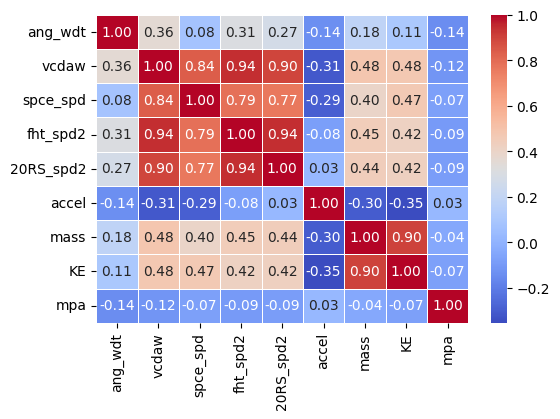

In [19]:
sun_corr = data[sun_cols].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(sun_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show

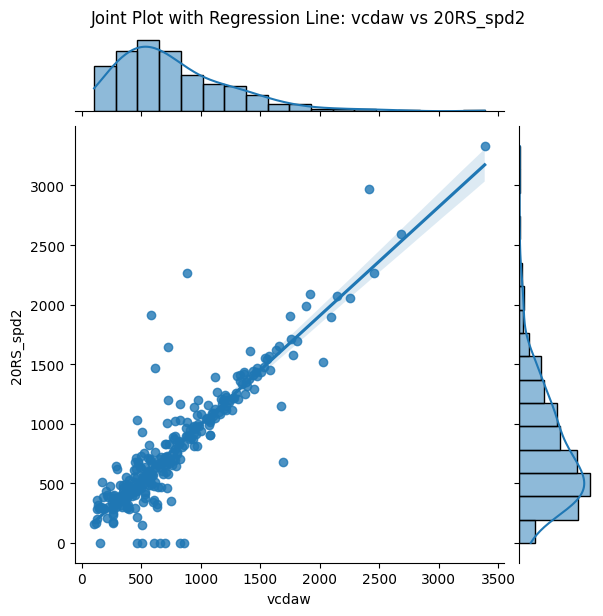

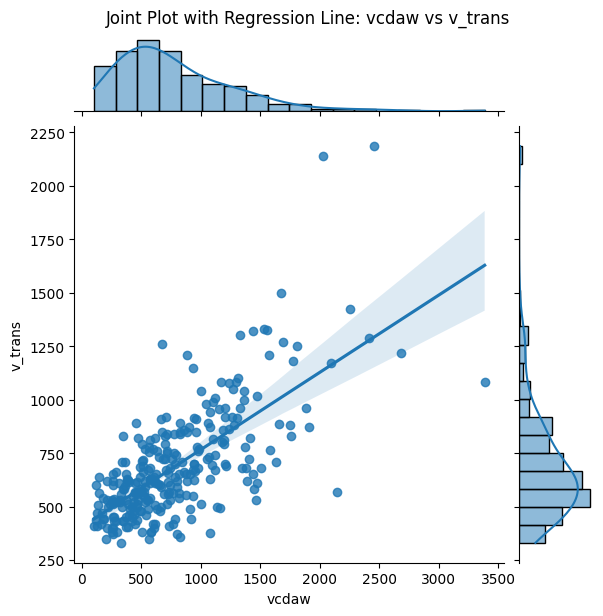

In [32]:

# Joint plot for vcdaw vs 20RS_fht with regression line
sns.jointplot(x="vcdaw", y="20RS_spd2", data=data, kind="reg", height=6)
plt.suptitle("Joint Plot with Regression Line: vcdaw vs 20RS_spd2", y=1.02)

# Joint plot for vcdaw vs v_trans  with regression line
sns.jointplot(x="vcdaw", y="v_trans", data=data, kind="reg", height=6)
plt.suptitle("Joint Plot with Regression Line: vcdaw vs v_trans", y=1.02)

plt.show()

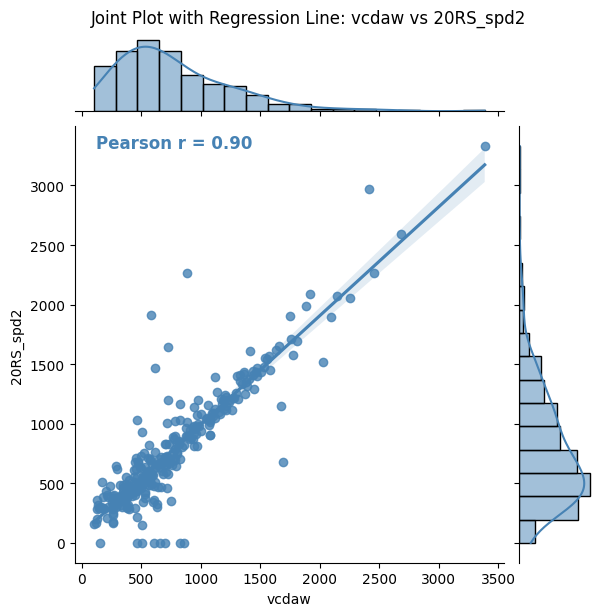

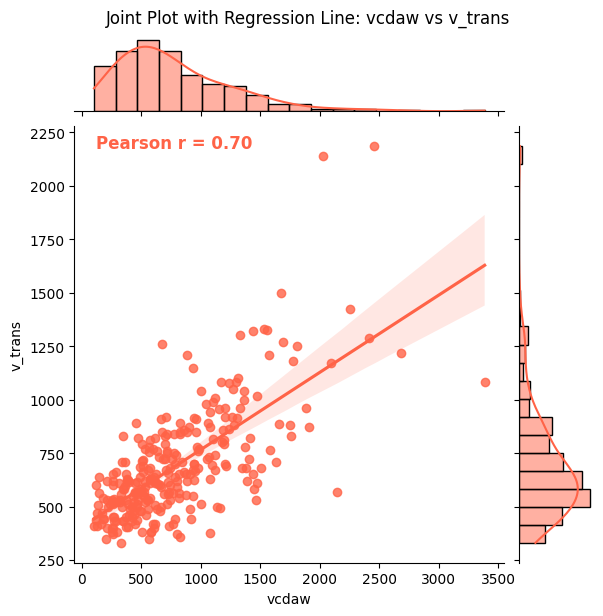

In [46]:
def jointplot_with_corr(x, y, data, color):
    # Drop NaN values for both x and y to ensure same length
    df_clean = data[[x, y]].dropna()

    # Compute Pearson correlation
    if len(df_clean) > 1:  # Ensure there are enough values for correlation
        corr, _ = pearsonr(df_clean[x], df_clean[y])
    else:
        corr = np.nan  # Assign NaN if correlation can't be computed

    # Create the joint plot
    g = sns.jointplot(x=x, y=y, data=data, kind="reg", height=6, color=color)

    # Add Pearson correlation annotation inside the plot
    g.ax_joint.annotate(f'Pearson r = {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', 
                        fontsize=12, fontweight='bold', color=color)

    # Set title
    plt.suptitle(f"Joint Plot with Regression Line: {x} vs {y}", y=1.02)

# Plot for vcdaw vs 20RS_fht
jointplot_with_corr("vcdaw", "20RS_spd2", data, color="steelblue")

# Plot for vcdaw vs v
jointplot_with_corr("vcdaw", "v_trans", data, color="tomato")

plt.show()

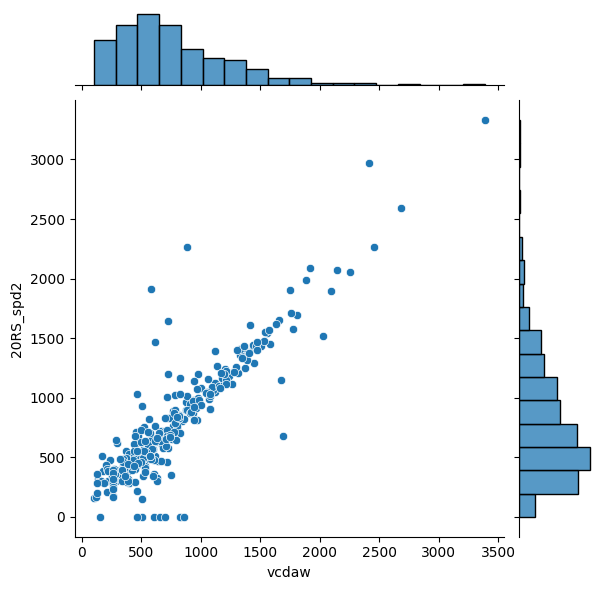

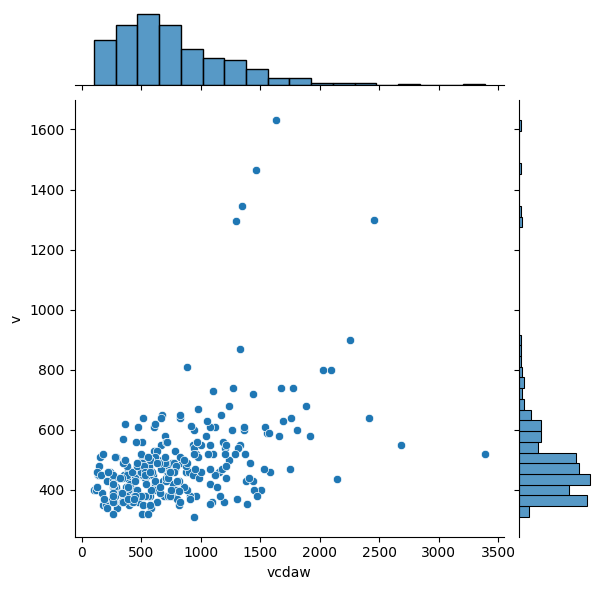

In [21]:
sns.jointplot(x="vcdaw", y="20RS_spd2", data=data, kind="scatter", height=6)
sns.jointplot(x="vcdaw", y="v", data=data, kind="scatter", height=6)
plt.show()

### Flare Values

In [156]:
flr_cols = ["src_typ", "NOAA", "onset_time", "hale_class"]

In [157]:
datainfo('d',cols=flr_cols)

src_typ        object
NOAA          float64
onset_time     object
hale_class     object
dtype: object


In [158]:
data["src_typ"] = data["src_typ"].astype("category")

In [159]:
data["onset_time"] = pd.to_datetime(data["onset_time"], errors="coerce")

/tmp/ipykernel_1887/1770729215.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["onset_time"] = pd.to_datetime(data["onset_time"], errors="coerce")


In [160]:

mask = data["onset_time"].dt.date.isna()  # Find rows where date is missing
data.loc[mask, "onset_time"] = data.loc[mask, "datetime"].dt.date.astype(str) + " " + data.loc[mask, "onset_time"].astype(str)

# Convert back to datetime
data["onset_time"] = pd.to_datetime(data["onset_time"])

/tmp/ipykernel_1887/1015246725.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['1996-12-19 NaT' '1997-04-07 NaT' '1997-07-30 NaT' '1997-09-28 NaT'
 '1997-11-19 NaT' '1998-08-24 NaT' '1998-10-15 NaT' '2001-08-14 NaT'
 '2001-11-04 NaT' '2004-09-14 NaT' '2005-06-09 NaT' '2005-09-09 NaT'
 '2007-11-15 NaT' '2013-08-21 NaT' '2018-03-06 NaT' '2022-12-30 NaT']' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data.loc[mask, "onset_time"] = data.loc[mask, "datetime"].dt.date.astype(str) + " " + data.loc[mask, "onset_time"].astype(str)
/tmp/ipykernel_1887/1015246725.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["onset_time"] = pd.to_datetime(data["onset_time"])


DateParseError: Unknown datetime string format, unable to parse: 1996-12-19 NaT, at position 0

In [ ]:
data["onset_time"] = pd.to_datetime(data["onset_time"], errors="coerce")

In [ ]:
data["onset_time"] = data["onset_time"].combine_first(data["datetime"])

In [ ]:
data[30:40]["onset_time"]

### Earth Values

In [53]:
earth_dt_clmns = ['flr_dt','flr_tm','icme_dst_dt','icme_dst_tm','plsm_strt_dt','plsm_strt_tm','plsm_end_dt','plsm_end_tm']
pos = [data.columns.get_loc(col) for col in earth_dt_clmns]
print(pos)

[16, 17, 18, 19, 20, 21, 22, 23]


In [54]:
def datetimeconvert(pos,colname,dtcol,tmcol):
    data.insert(pos,colname,pd.to_datetime(data[dtcol] + ' ' + data[tmcol], errors ='coerce'))
    data.drop(columns=[dtcol,tmcol], inplace = True)

In [55]:
datetimeconvert(16,'flr_dttm','flr_dt','flr_tm') 
datetimeconvert(17,'icme_dst_dttm','icme_dst_dt','icme_dst_tm')       
datetimeconvert(18,'plsm_strt_dttm','plsm_strt_dt','plsm_strt_tm')
datetimeconvert(19,'plsm_end_dttm','plsm_end_dt','plsm_end_tm')

In [56]:
datainfo('s','c')

(287, 38)
Index(['src', 'datetime', 'ang_wdt', 'vcdaw', 'spce_spd', 'fht_spd2',
       '20RS_spd2', 'accel', 'mass', 'KE', 'mpa', 'src_typ', 'NOAA',
       'onset_time', 'hale_class', 'flr_class', 'flr_dttm', 'icme_dst_dttm',
       'plsm_strt_dttm', 'plsm_end_dttm', 'comp_strt', 'comp_end', 'qual',
       'dv', 'fst_fwd_shck', 'v', 'min_dst_icme', 'v_max', 'meanB', 'mc',
       'v_trans', 'trans_time', 'icme_sz', 'Icme_min_Bz', 'sheath_spd',
       'sheath_sz', 'sheath_dst', 'sheath Bz'],
      dtype='object')


In [57]:
earth_cols = ['flr_class', 'flr_dttm', 'icme_dst_dttm', 'plsm_strt_dttm', 'plsm_end_dttm', 
              'comp_strt', 'comp_end', 'qual', 'dv', 'fst_fwd_shck', 'v', 'min_dst_icme', 
              'v_max', 'meanB', 'mc', 'v_trans', 'trans_time']

In [58]:
datainfo('s','d',cols=earth_cols)

(287, 17)
flr_class                 object
flr_dttm          datetime64[ns]
icme_dst_dttm     datetime64[ns]
plsm_strt_dttm    datetime64[ns]
plsm_end_dttm     datetime64[ns]
comp_strt                float64
comp_end                 float64
qual                      object
dv                       float64
fst_fwd_shck              object
v                        float64
min_dst_icme               int64
v_max                    float64
meanB                    float64
mc                       float64
v_trans                  float64
trans_time                object
dtype: object


In [59]:
data["qual"].unique()

array(['2', '1', '3W', '2W', '3', nan], dtype=object)

In [60]:
# Define the ordered categories
order = ["1", "2", "2W", "3", "3W"]

# Convert to an ordered categorical variable
data["qual"] = pd.Categorical(data["qual"], categories=order, ordered=True)

# data["qual_code"] = data["qual"].cat.codes '''use for binary model'''

In [61]:
# convert shock into category
data["fst_fwd_shck"] = data["fst_fwd_shck"].astype("category")

# data["fst_fwd_shck"] = data["fst_fwd_shck"].map({"S": 0, "C": 1}) ''' use for binary model '''

In [62]:
datainfo('s','n',cols=earth_cols)

(287, 17)
flr_class         139
flr_dttm          242
icme_dst_dttm      25
plsm_strt_dttm      1
plsm_end_dttm      36
comp_strt         172
comp_end          182
qual                2
dv                 14
fst_fwd_shck        0
v                   3
min_dst_icme        0
v_max              17
meanB              17
mc                 17
v_trans             5
trans_time          0
dtype: int64


In [63]:
drop_earth_col = ['flr_class' ,'flr_dttm', 'comp_strt', 'comp_end']
earth_cols = [col for col in earth_cols if col not in drop_earth_col ]
data.drop(drop_earth_col, inplace=True, axis=1)

In [64]:
data.fillna(
    {
        **{col: data[col].median() for col in ["dv", "v", "v_max", "v_trans"]},
        **{col: round(data[col].mean(), 1) for col in ["meanB"]},
        "mc": -1  # Replace NaNs in "mc" with -1
    }, 
    inplace=True
)

In [65]:
data["mc"] = data["mc"].astype(int)

In [66]:
data['trans_time'] = ((148000000/data['v_trans'])/3600).round(1)

In [67]:
datainfo('s','d',cols=earth_cols)

(287, 13)
icme_dst_dttm     datetime64[ns]
plsm_strt_dttm    datetime64[ns]
plsm_end_dttm     datetime64[ns]
qual                    category
dv                       float64
fst_fwd_shck            category
v                        float64
min_dst_icme               int64
v_max                    float64
meanB                    float64
mc                         int64
v_trans                  float64
trans_time               float64
dtype: object


In [68]:
datainfo('n',cols=earth_cols)

icme_dst_dttm     25
plsm_strt_dttm     1
plsm_end_dttm     36
qual               2
dv                 0
fst_fwd_shck       0
v                  0
min_dst_icme       0
v_max              0
meanB              0
mc                 0
v_trans            0
trans_time         0
dtype: int64


In [177]:
data.to_csv('check_cme.csv',index=False)

<function matplotlib.pyplot.show(close=None, block=None)>

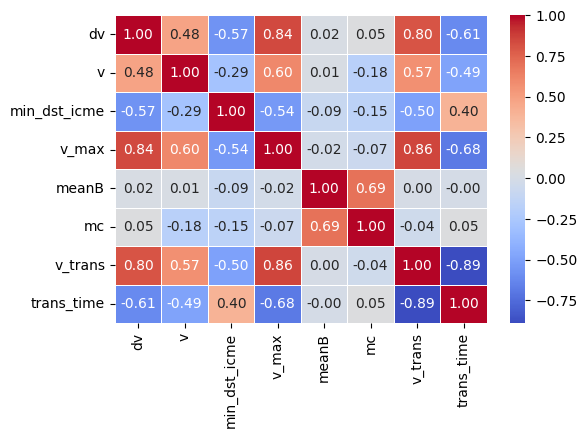

In [200]:
earth_corr = data[data[earth_cols].select_dtypes(include=['number']).columns.tolist()].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(earth_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

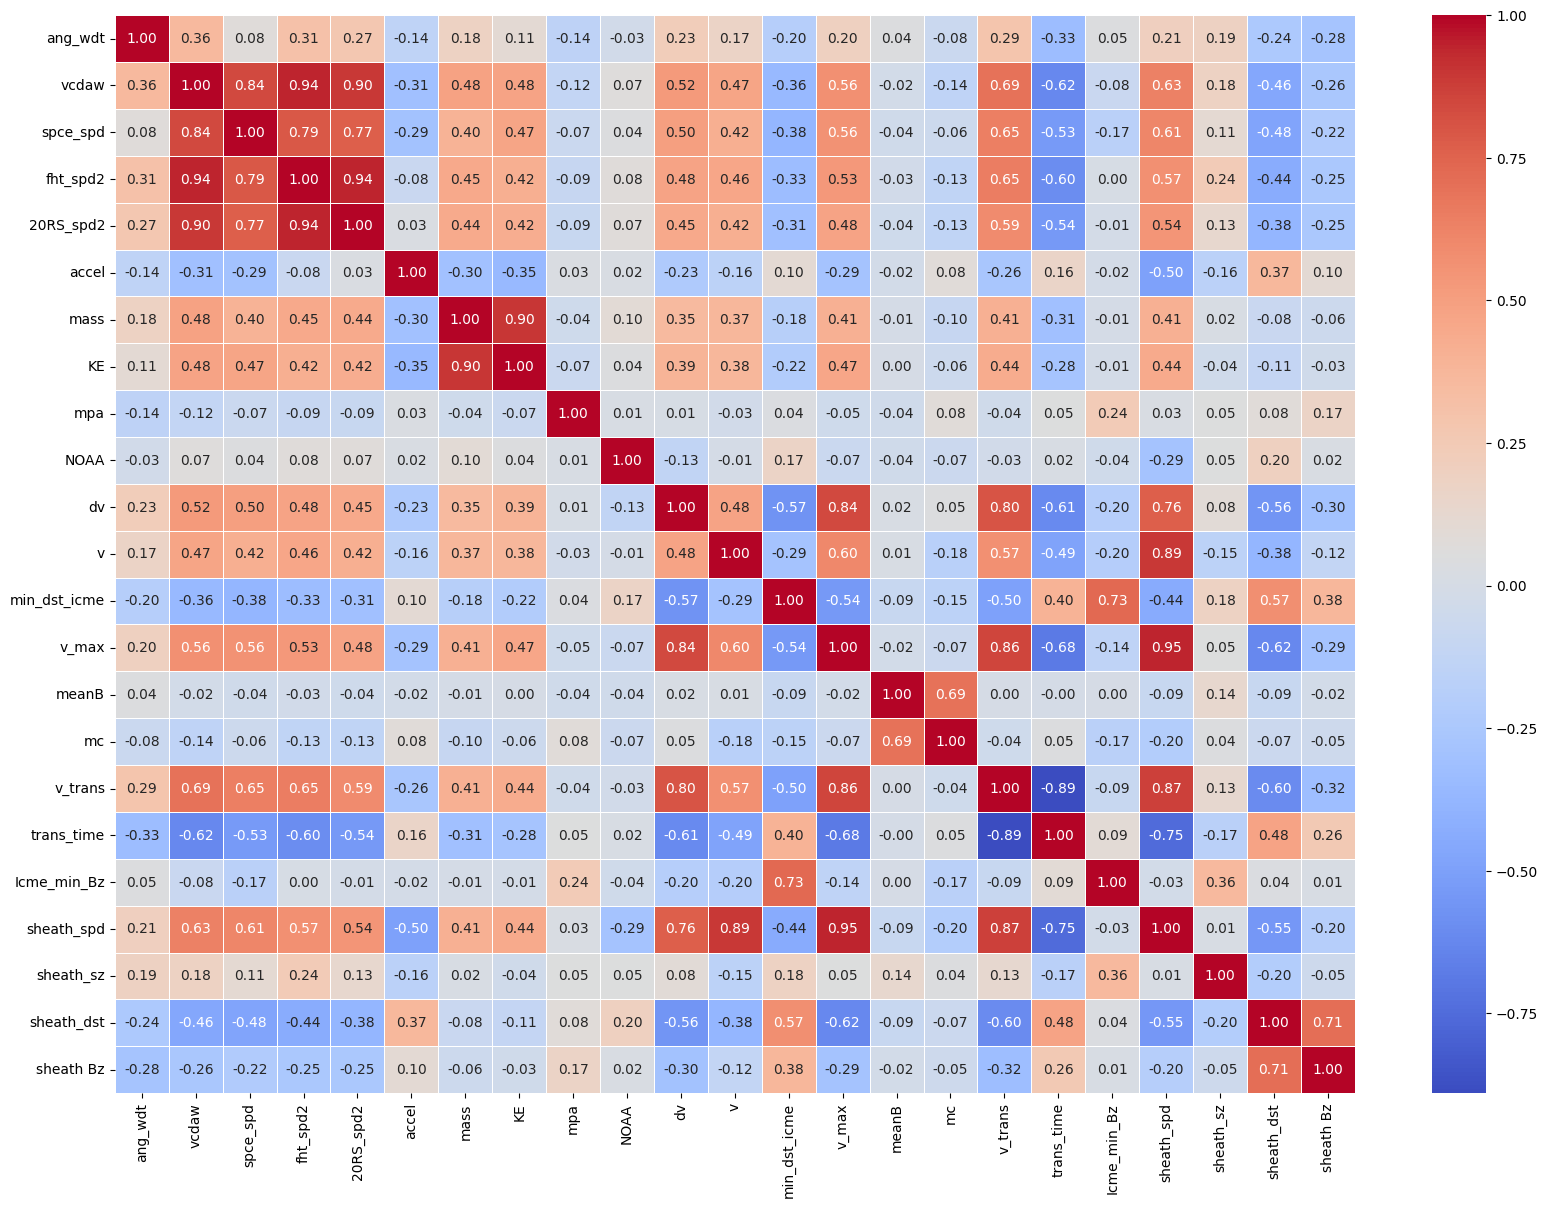

In [204]:
corr = data[data.select_dtypes(include=['number']).columns.tolist()].corr()
plt.figure(figsize=(20, 14))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show

In [71]:
col = ["v_trans","trans_time"]
data[col].describe()

,v_trans,trans_time
count,287.000000,287.000000
mean,688.053902,66.438328
std,255.507309,20.303236
min,330.000000,18.800000
25%,520.000000,51.700000
50%,630.000000,65.300000
75%,795.000000,79.100000
max,2185.000000,124.600000
